In [23]:
import numpy as np
import matplotlib.pyplot as plt
import math

# def s_curve_function(B):
#     """
#     S-curve function based on the given formula:
#     - m(B) = 0.5 if B < 10,000
#     - m(B) = 0.5 + 2.5/(1 + exp[-0.9×(ln(B)-10)]) if 10,000 ≤ B < 75,000,000
#     - m(B) = 3.0 if B ≥ 75,000,000
#     """
#     if B < 10000:
#         return 0.5
#     elif B < 75000000:
#         # m(B) = 0.5 + 2.5/(1 + exp[-0.9×(ln(B)-14.4)])
#         ln_B = math.log(B)
#         exp_term = math.exp(-0.9 * (ln_B - 14.4))
#         return 0.5 + 2.5 / (1 + exp_term)
#     else:
#         return 3.0

# # Vectorize the function to work with numpy arrays
# s_curve_vectorized = np.vectorize(s_curve_function)


In [24]:
import math

B_MIN   = 10_000      # eligibility threshold
K       = 2.2         # slope
X0      = 6.23        # log-10 pivot

def multiplier(balance: float) -> float:
    """Balance-based S-curve, clamped to [0.5, 3.0]."""
    m = 0.5 + 2.5 / (1 + math.exp(-K * (math.log10(balance) - X0)))
    return max(0.5, min(3.0, m))


s_curve_vectorized = np.vectorize(multiplier)

In [27]:
# Test the function with some example values
test_values = [5000, 8000, 10000, 25000, 50000, 75000, 100000, 500000, 1000000, 5000000, 10000000, 50000000, 75000000, 90000000, 100000000]

print("Testing S-curve function:")
print("B\t\tm(B)")
print("-" * 20)
for B in test_values:
    result = multiplier(B)
    print(f"{B:,}\t\t{result:.4f}")


Testing S-curve function:
B		m(B)
--------------------
5,000		0.5095
8,000		0.5149
10,000		0.5184
25,000		0.5436
50,000		0.5833
75,000		0.6207
100,000		0.6566
500,000		1.0929
1,000,000		1.4403
5,000,000		2.3431
10,000,000		2.6119
50,000,000		2.9050
75,000,000		2.9347
90,000,000		2.9449
100,000,000		2.9501


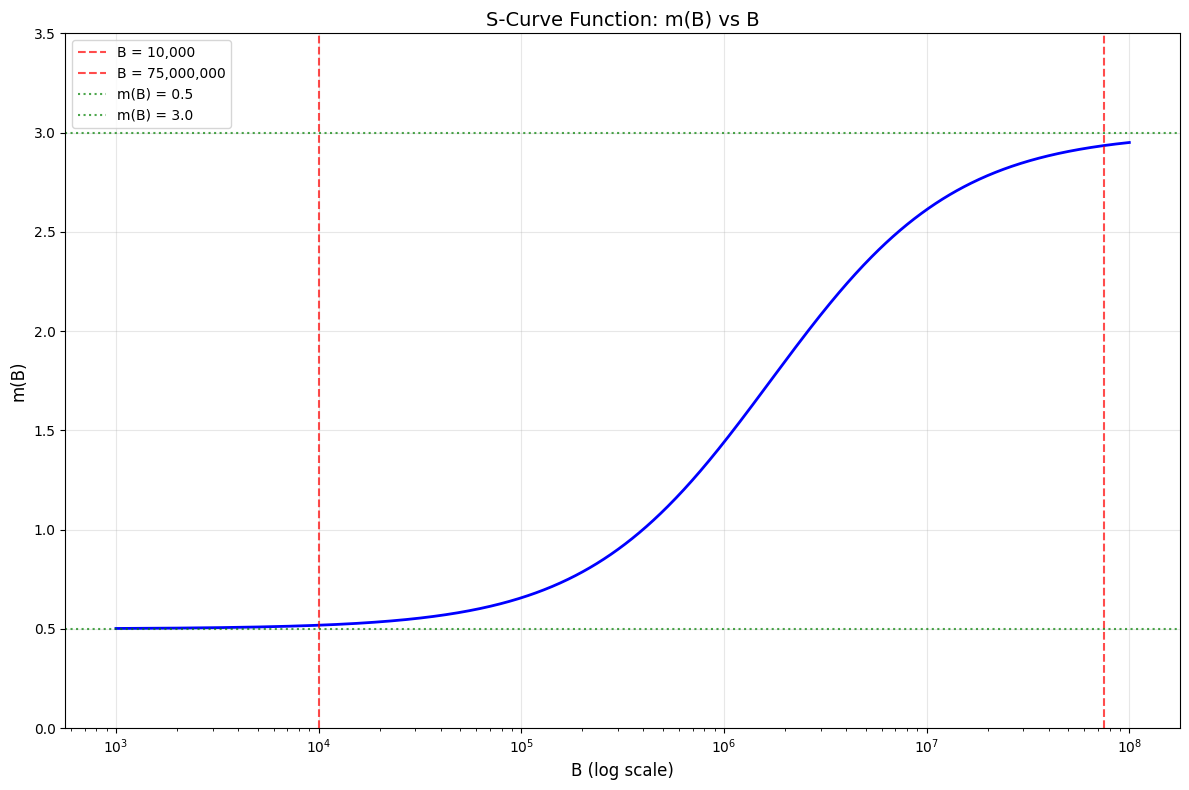

In [26]:

# Create a plot of the S-curve
# Generate B values for plotting (using log scale for better visualization)
B_values = np.logspace(3, 8, 1000)  # From 1,000 to 100,000,000

# Calculate corresponding m(B) values
m_values = s_curve_vectorized(B_values)

# Create the plot
plt.figure(figsize=(12, 8))
plt.semilogx(B_values, m_values, linewidth=2, color='blue')
plt.xlabel('B (log scale)', fontsize=12)
plt.ylabel('m(B)', fontsize=12)
plt.title('S-Curve Function: m(B) vs B', fontsize=14)
plt.grid(True, alpha=0.3)

# Add vertical lines to show the transition points
plt.axvline(x=10000, color='red', linestyle='--', alpha=0.7, label='B = 10,000')
plt.axvline(x=75000000, color='red', linestyle='--', alpha=0.7, label='B = 75,000,000')

# Add horizontal lines to show the plateau values
plt.axhline(y=0.5, color='green', linestyle=':', alpha=0.7, label='m(B) = 0.5')
plt.axhline(y=3.0, color='green', linestyle=':', alpha=0.7, label='m(B) = 3.0')

plt.legend()
plt.ylim(0, 3.5)
plt.tight_layout()
plt.show()




In [ ]:
def s_curve_function_v2(B):
    """
    Updated S-curve function based on the new formula:
    - m(B) = 0.5 if B < 10,000
    - m(B) = 0.5 + 2.587/(1 + exp[-0.9×(ln(B)-14.4)]) if 10,000 ≤ B < 75,000,000
    - m(B) = 3.0 if B ≥ 75,000,000
    """
    if B < 10000:
        return 0.5
    elif B < 75000000:
        # m(B) = 0.5 + 2.587/(1 + exp[-0.9×(ln(B)-14.4)])
        ln_B = math.log(B)
        exp_term = math.exp(-0.9 * (ln_B - 14.4))
        return 0.5 + 2.587 / (1 + exp_term)
    else:
        return 3.0

# Vectorize the updated function
s_curve_v2_vectorized = np.vectorize(s_curve_function_v2)


In [ ]:
# Test the updated function with the same example values
test_values = [5000, 10000, 50000, 100000, 1000000, 10000000, 75000000, 100000000]

print("Testing Updated S-curve function (v2):")
print("B\t\tm(B) v1\t\tm(B) v2\t\tDifference")
print("-" * 60)
for B in test_values:
    result_v1 = s_curve_function(B)
    result_v2 = s_curve_function_v2(B)
    diff = result_v2 - result_v1
    print(f"{B:,}\t\t{result_v1:.4f}\t\t{result_v2:.4f}\t\t{diff:+.4f}")


In [ ]:
# Create a plot of the updated S-curve
# Generate B values for plotting (using log scale for better visualization)
B_values = np.logspace(3, 8, 1000)  # From 1,000 to 100,000,000

# Calculate corresponding m(B) values for both versions
m_values_v1 = s_curve_vectorized(B_values)
m_values_v2 = s_curve_v2_vectorized(B_values)

# Create the plot
plt.figure(figsize=(12, 8))
plt.semilogx(B_values, m_values_v2, linewidth=2, color='red', label='S-curve v2 (coeff=2.587)')
plt.semilogx(B_values, m_values_v1, linewidth=2, color='blue', linestyle='--', alpha=0.7, label='S-curve v1 (coeff=2.5)')

plt.xlabel('B (log scale)', fontsize=12)
plt.ylabel('m(B)', fontsize=12)
plt.title('Updated S-Curve Function: m(B) vs B (Comparison)', fontsize=14)
plt.grid(True, alpha=0.3)

# Add vertical lines to show the transition points
plt.axvline(x=10000, color='green', linestyle='--', alpha=0.7, label='B = 10,000')
plt.axvline(x=75000000, color='green', linestyle='--', alpha=0.7, label='B = 75,000,000')

# Add horizontal lines to show the plateau values
plt.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, label='m(B) = 0.5')
plt.axhline(y=3.0, color='gray', linestyle=':', alpha=0.7, label='m(B) = 3.0')

plt.legend()
plt.ylim(0, 3.5)
plt.tight_layout()
plt.show()


In [ ]:
# Create individual plots for better visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot 1: Updated S-curve function only
ax1.semilogx(B_values, m_values_v2, linewidth=3, color='red')
ax1.set_xlabel('B (log scale)', fontsize=12)
ax1.set_ylabel('m(B)', fontsize=12)
ax1.set_title('Updated S-Curve Function v2 (coefficient = 2.587)', fontsize=14)
ax1.grid(True, alpha=0.3)

# Add vertical lines to show the transition points
ax1.axvline(x=10000, color='green', linestyle='--', alpha=0.7, label='B = 10,000')
ax1.axvline(x=75000000, color='green', linestyle='--', alpha=0.7, label='B = 75,000,000')

# Add horizontal lines to show the plateau values
ax1.axhline(y=0.5, color='gray', linestyle=':', alpha=0.7, label='m(B) = 0.5')
ax1.axhline(y=3.0, color='gray', linestyle=':', alpha=0.7, label='m(B) = 3.0')

ax1.legend()
ax1.set_ylim(0, 3.5)

# Plot 2: Difference between v2 and v1
difference = m_values_v2 - m_values_v1
ax2.semilogx(B_values, difference, linewidth=2, color='purple')
ax2.set_xlabel('B (log scale)', fontsize=12)
ax2.set_ylabel('Difference (v2 - v1)', fontsize=12)
ax2.set_title('Difference between S-curve v2 and v1', fontsize=14)
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='-', alpha=0.5)

# Add vertical lines for transition points
ax2.axvline(x=10000, color='green', linestyle='--', alpha=0.7)
ax2.axvline(x=75000000, color='green', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()
